In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import gmaps.datasets 
import os
import seaborn as sns
import seaborn as sb
from config import gkey


gmaps.configure(api_key=gkey)


In [3]:
for_plotting = pd.read_csv ('Fire.csv')
for_plotting
#Group inconsistent battallion names into one single integer battallion
for_plotting=for_plotting.replace({
    "2B":"2",
    "2C":"2",
    "3C":"3",
    "4C":"4",
    "5B":"5",
    "6A":"6",
    "7A":"7",
    "7B":"7",
    "7B`":"7",
    "8B":"8",
    "8C":"8",
    "9A":"9",
    "9C":"9"   
})
for_plotting

for_plotting.to_csv(r'Fire.csv', index = False)

for_plotting



,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


In [4]:
for_plotting['BATTALION'].count()
#average percentloss by batallion
avg_loss_by_battalion=for_plotting.groupby(['BATTALION']).mean()['PERCENTAGE LOSS']
avg_loss_by_battalion

BATTALION
1    14.047705
2     4.122373
3    10.243651
4     6.423684
5    13.121111
6    11.848267
7    11.857234
8    13.867857
9    14.656667
Name: PERCENTAGE LOSS, dtype: float64

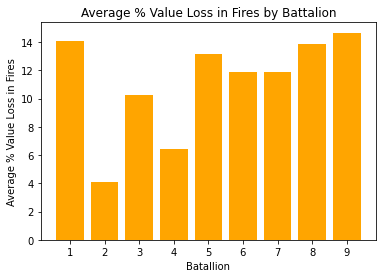

In [5]:
unique_battalion=for_plotting['BATTALION'].unique()
unique_battalion.sort()

# plot avg. loss by battalion on bar chart

x_axis=unique_battalion
y_axis=avg_loss_by_battalion
plt.xticks(unique_battalion)
plt.bar(x_axis,y_axis,color=['orange'])


plt.xlabel("Batallion")
plt.ylabel("Average % Value Loss in Fires")
plt.title("Average % Value Loss in Fires by Battalion")

plt.show()




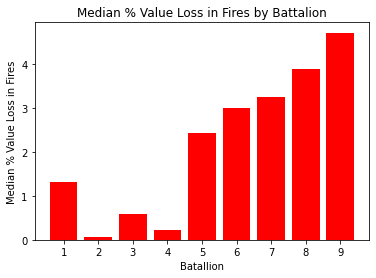

In [6]:
#median of Value % loss in fires by battalion
#median percent value loss by batallion
median_loss_by_battalion=for_plotting.groupby(['BATTALION']).median()['PERCENTAGE LOSS']
median_loss_by_battalion

x_axis=unique_battalion
y_axis=median_loss_by_battalion
plt.xticks(unique_battalion)
plt.bar(x_axis,y_axis,color=['red'])

plt.xlabel("Batallion")
plt.ylabel("Median % Value Loss in Fires")
plt.title("Median % Value Loss in Fires by Battalion")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

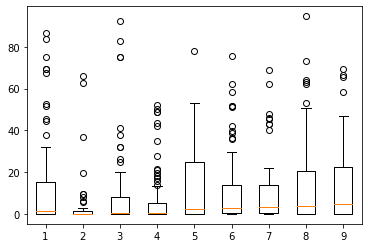

In [7]:
#Box Plot for above data. Define the columns that we want for each battalion and its respective array of Percentage Loss
b1_percentloss=for_plotting.loc[for_plotting['BATTALION']==1]
b1_percentloss_list=b1_percentloss['PERCENTAGE LOSS']
b1_percentloss_list

b2_percentloss=for_plotting.loc[for_plotting['BATTALION']==2]
b2_percentloss_list=b2_percentloss['PERCENTAGE LOSS']
b2_percentloss_list

b3_percentloss=for_plotting.loc[for_plotting['BATTALION']==3]
b3_percentloss_list=b3_percentloss['PERCENTAGE LOSS']
b3_percentloss_list

b4_percentloss=for_plotting.loc[for_plotting['BATTALION']==4]
b4_percentloss_list=b4_percentloss['PERCENTAGE LOSS']
b4_percentloss_list

b5_percentloss=for_plotting.loc[for_plotting['BATTALION']==5]
b5_percentloss_list=b5_percentloss['PERCENTAGE LOSS']
b5_percentloss_list

b6_percentloss=for_plotting.loc[for_plotting['BATTALION']==6]
b6_percentloss_list=b6_percentloss['PERCENTAGE LOSS']
b6_percentloss_list

b7_percentloss=for_plotting.loc[for_plotting['BATTALION']==7]
b7_percentloss_list=b7_percentloss['PERCENTAGE LOSS']
b7_percentloss_list

b8_percentloss=for_plotting.loc[for_plotting['BATTALION']==8]
b8_percentloss_list=b8_percentloss['PERCENTAGE LOSS']
b8_percentloss_list

b9_percentloss=for_plotting.loc[for_plotting['BATTALION']==9]
b9_percentloss_list=b9_percentloss['PERCENTAGE LOSS']
b9_percentloss_list

columns=[b1_percentloss_list,b2_percentloss_list,b3_percentloss_list,b4_percentloss_list,b5_percentloss_list,
        b6_percentloss_list,b7_percentloss_list,b8_percentloss_list,b9_percentloss_list]  

fig,ax=plt.subplots()
ax.boxplot(columns)
plt.show


# HEATMAP BASED ON PERCENTAGE LOSS

In [8]:
lat_for_map=for_plotting['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=for_plotting['Lng'].astype(float)
lng_for_map.astype(float)

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [9]:

# Store 'Lat' and 'Lng' into  locations 
coordinates = for_plotting[["Lat", "Lng"]]

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
percentage_value_lost = for_plotting["PERCENTAGE LOSS"].astype(float)/100

In [10]:
# Create a Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(coordinates, weights=percentage_value_lost,
                                 dissipating=False, max_intensity=3.5, point_radius=0.02)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

# HEATMAP BASED ON TOTAL LOSS

In [11]:
tot_val=for_plotting['TOTAL VALUE']
total_saved=for_plotting['TOTAL SAVED']
total_loss=tot_val-total_saved
total_loss.astype(float)


# Store 'Lat' and 'Lng' into  locations 
location = for_plotting[["Lat", "Lng"]].astype(float)

total_loss= total_loss.astype(float)/100

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(location, weights=total_loss,
                                 dissipating=False, max_intensity=0.9, point_radius=0.0365)

fig.add_layer(heat_layer)

fig    






Figure(layout=FigureLayout(height='420px'))

In [6]:
explore_more_data=pd.read_csv ('Fire.csv')
explore_more_data

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


# MAP PINPOINTING ALL FIRES


In [16]:
explore_more_data
lat_for_map=explore_more_data['Lat']
lat_for_map

lng_for_map=explore_more_data['Lng']
lng_for_map

lat_for_map
lng_for_map

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [3]:
# locations=explore_more_data[['Lat','Lng']]
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)
explore_more_data

NameError: name 'explore_more_data' is not defined

# PLOT ALL FIRES IN OUR DATASET

In [18]:
fires_df=explore_more_data[['Lat','Lng']]


fires_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)
fig=gmaps.figure()
fig.add_layer(fires_layer)
fig

Lat    621
Lng    621
dtype: int64

# PLOT ALL FIRES BY BATTALION THAT RESPONDED


In [12]:
b1_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==1]
b1_fires_layer=b1_fires_responded[['Lat','Lng']]

b2_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==2]
b2_fires_layer=b2_fires_responded[['Lat','Lng']]

b3_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==3]
b3_fires_layer=b3_fires_responded[['Lat','Lng']]

b4_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==4]
b4_fires_layer=b4_fires_responded[['Lat','Lng']]

b5_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==5]
b5_fires_layer=b5_fires_responded[['Lat','Lng']]

b6_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==6]
b6_fires_layer=b6_fires_responded[['Lat','Lng']]

b7_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==7]
b7_fires_layer=b7_fires_responded[['Lat','Lng']]

b8_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==8]
b8_fires_layer=b8_fires_responded[['Lat','Lng']]

b9_fires_responded=explore_more_data.loc[explore_more_data['BATTALION']==9]
b9_fires_layer=b9_fires_responded[['Lat','Lng']]

b1_layer=gmaps.symbol_layer(b1_fires_layer,fill_color=(0,255,0),stroke_color=(0,255,0),scale=2)    #GREEN
b2_layer=gmaps.symbol_layer(b2_fires_layer,fill_color=(0,0,254),stroke_color=(0,0,254),scale=2)    #BLUE
b3_layer=gmaps.symbol_layer(b3_fires_layer,fill_color=(255,0,0),stroke_color=(255,0,0),scale=2)    #RED
b4_layer=gmaps.symbol_layer(b4_fires_layer,fill_color=(255,165,0),stroke_color=(255,165,0),scale=2)  #ORANGE
b5_layer=gmaps.symbol_layer(b5_fires_layer,fill_color=(255,105,180),stroke_color=(255,105,180),scale=2)   #PINK
b6_layer=gmaps.symbol_layer(b6_fires_layer,fill_color=(134,1,175),stroke_color=(134,1,175),scale=2)     #VIOLET
b7_layer=gmaps.symbol_layer(b7_fires_layer,fill_color=(64,224,208),stroke_color=(64,224,208),scale=2)   #TURQOISE
b8_layer=gmaps.symbol_layer(b8_fires_layer,fill_color=(150,75,0),stroke_color=(150,75,0),scale=2)    #BROWN
b9_layer=gmaps.symbol_layer(b9_fires_layer,fill_color=(128,128,128),stroke_color=(128,128,128),scale=2)    #GREY

fig=gmaps.figure()
fig.add_layer(b1_layer)
fig.add_layer(b2_layer)
fig.add_layer(b3_layer)
fig.add_layer(b4_layer)
fig.add_layer(b5_layer)
fig.add_layer(b6_layer)
fig.add_layer(b7_layer)
fig.add_layer(b8_layer)
fig.add_layer(b9_layer)
fig


Figure(layout=FigureLayout(height='420px'))